### Overview of Prosper Loan Data Exploration

###### Investigation overview

Various anaysis and exploration are targetted to get an insight to know variables which affect the the credit rating i.e. Prosper Rating and make a prediction on credit default.

###### Dataset overview

As the shape of the dataframe revealed we had 113937 rows with 81 columns, out of them many columns were not making any support for the analysis  like loan ListingKey, ListingNumber, ListingCreationDate etc. which are more relevant for the record point of view. I have understood the definitions ofeach variable from the Variable Definition file. This file was not read into pandas as its not relevant.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

df = pd.read_csv(r'prosperLoanData.csv')
df.head()

#### Data wrangling

In [6]:
df_select = [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]
df_select = df[df_select]
df_select = df_select.dropna(subset=['ProsperRating (Alpha)']).reset_index()
df_select['TotalProsperLoans'] = df_select['TotalProsperLoans'].fillna(0)
df_select['LoanOriginationDate'] = pd.to_datetime(df_select['LoanOriginationDate'])
df = df_select

###### Checking, the key features which might have a bearing on defaulting on credit and company credit rating
Based on analysis of the data set , I consider Propser credit rating will indicate the credit behaviour of the client. When considering the facors that influence Prosper credit rating, I assume the employee income, employment status, loan amount and the catrgory of credit are the factors for the purpose. This is based on the common domain knowledge.

####  Univariate - Based on Loan status

<Figure size 1152x864 with 0 Axes>

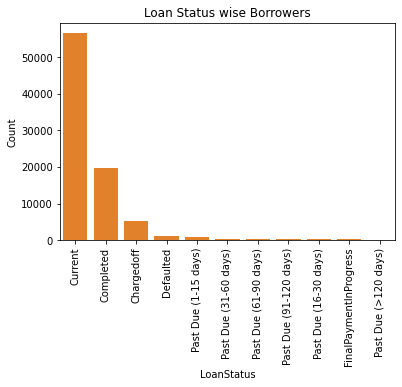

<Figure size 1152x864 with 0 Axes>

In [7]:
# setting color
ordls = df['LoanStatus'].value_counts().index
base_color = sns.color_palette()[1]
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'LoanStatus', color = base_color, order = ordls); #countplot , by default takes count of each variable valye on x axis
plt.title('Loan Status wise Borrowers')
plt.ylabel('Count')
plt.figure(figsize=(16,12))

###### Observation 1 

* Tallest bar in the graph is from current loans
* Completed loans form the second bigger chunk, moreover sizeable component of employees loans has been charges off
* Due date passed for a smaller number of employees loans

####  Univariate- Based on Employment Status

Text(0, 0.5, 'Count')

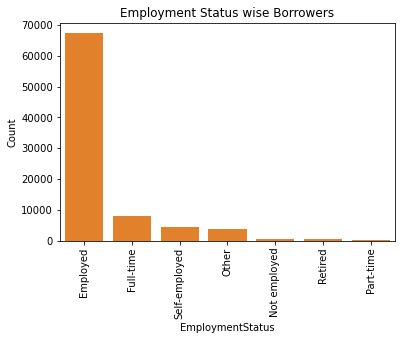

In [8]:
ord = df['EmploymentStatus'].value_counts().index
sns.countplot(data = df, x = 'EmploymentStatus', color = base_color, order = ord);
plt.xticks(rotation = 90);
plt.title('Employment Status wise Borrowers')
plt.ylabel('Count')

###### Observation 2
* Primarily the employess have taken loans 
* Full time and self employed loaners are the second and thirg group of loan recievers

#### Univariate - Based on Stated Monthly Income

Text(0, 0.5, 'Count')

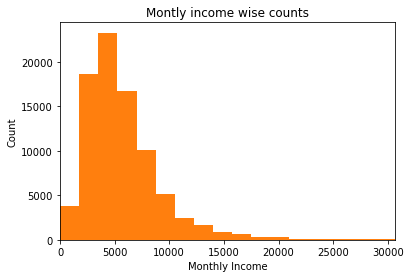

In [9]:
plt.hist(data= df, x='StatedMonthlyIncome', bins=1000);
plt.title('Income wise Borrowers')
plt.xlabel('Monthly Income')
mincome_std = df['StatedMonthlyIncome'].std()
mincome_mean = df['StatedMonthlyIncome'].mean()
boundary = mincome_mean + mincome_std * 3
plt.hist(data=df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);
plt.title('Montly income wise counts')
plt.xlabel('Monthly Income')
plt.ylabel('Count')

###### observation 3
* Mode is observed with boundary define is 5000, even then the graph is reght skewed 

#### Discussing the distribution(s) of my variable(s) of interest, check on unusual points and the need to perform any transformations
> Primary observation on Monthly income is that there are a lot of outliers with large range but still it is right skew. Employees are main loan takers and all other categories are small part of borrowers and most of the loans are current means active and inforce as per the understanding from the dataset

#### Check for any unusual distributions, Operations to clean the data
> Current loans is the main group of loans and as per the project assignment , I am trying to figure out the default behaviour.

####  Bivariate - Loan Status and PropserRating

Text(0, 0.5, 'Count')

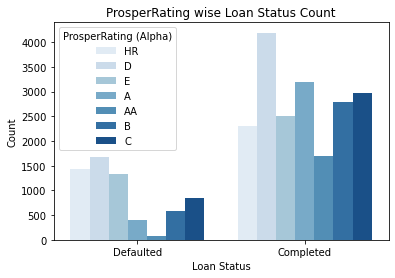

In [13]:
func = (df['LoanStatus'] == 'Completed') | (df['LoanStatus'] == 'Defaulted') |\
                  (df['LoanStatus'] == 'Chargedoff')
df = df[func]

def change_to_Defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df['LoanStatus'] = df.apply(change_to_Defaulted, axis=1)

sns.countplot(data = df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.title('ProsperRating wise Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')

###### Observation 1
* Rating D is most frequent, among Defaulted
* Rating D is also most frequent, among Completed followed by A and B and C maintain marginal difference

###### Bivariate - ListingCategory (numeric) and PropserRating

Text(0, 0.5, 'Count')

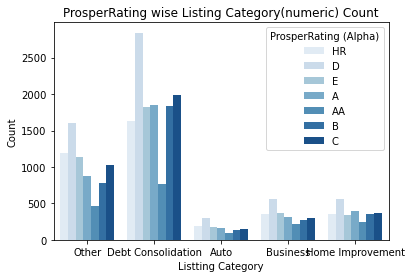

In [14]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df['ListingCategory (numeric)'] = df.apply(reduce_categorie, axis=1)
df['ListingCategory (numeric)'].value_counts()

sns.countplot(data = df, x = 'ListingCategory (numeric)', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.title('ProsperRating wise Listing Category(numeric) Count')
plt.xlabel('Listting Category')
plt.ylabel('Count')

###### Observation 2
* Rating D is most frequent, among Debt consolidattion

######  Bivariate - Loan Status and Listing Category

Text(0, 0.5, 'Count')

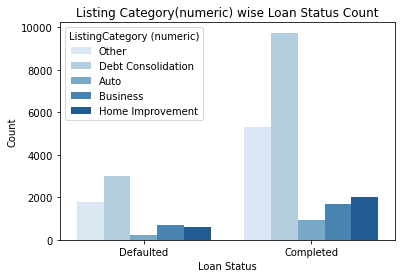

In [32]:
sns.countplot(data = df, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Blues');
plt.title('Listing Category(numeric) wise Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')

###### Observation 3
* Debt consolidation is the most frequent among completed so as for Defaulted

###### Bivariate - Loan Status and Loan Amount

Text(0, 0.5, 'Loan Original Amount')

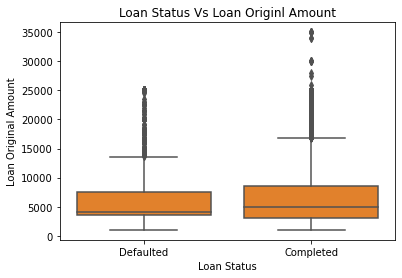

In [33]:
sns.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.title('Loan Status Vs Loan Originl Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')

###### Observation 4
* In both the LoanStatus group, LoanOriginalAmount is less than 10000, but defaults are less as compared to completed ones

###### Bivariate - Prosper Rating and Employment Status

Text(0, 0.5, 'Count')

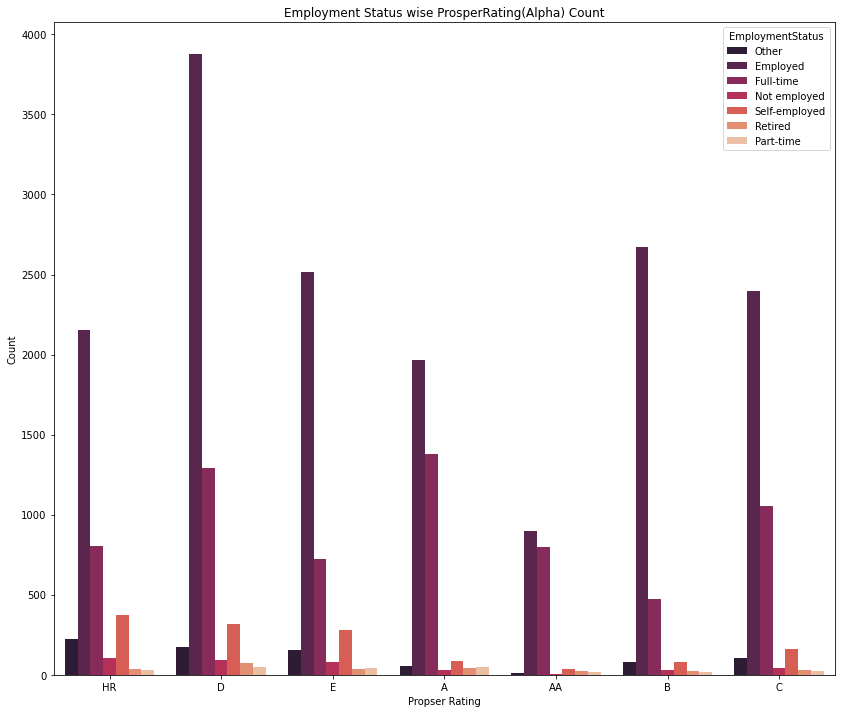

In [34]:
plt.figure(figsize = [14, 12])
sns.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'rocket');
plt.title('Employment Status wise ProsperRating(Alpha) Count')
plt.xlabel('Propser Rating')
plt.ylabel('Count')
#Experimenting with palette 'rocket'

###### Observation 5
* D rating group is formed by more frequent Other and Employed where as others are less frequent

#### Relationship finding between 2 interest item variables as analyzed and visualized
* After each bivariate plot I have mentioned observations
* Loanstatus and Loan amount defaulted credits tend to be smaller than completed credits onces. 
* Rating D is most frequent, among Defaulted
* Rating D is also most frequent, among Completed followed by A and B and C maintain marginal difference

#### Interesting relationshipsobserved between 2 other variables
* ProsperRrating D is the most frequent rating among Defaulted and Completed group as well

###### Multivariate - LoanOriginalAmount, LoanStatus and PropserRating(Alpha)

Text(0, 0.5, 'Loan Origina Amount')

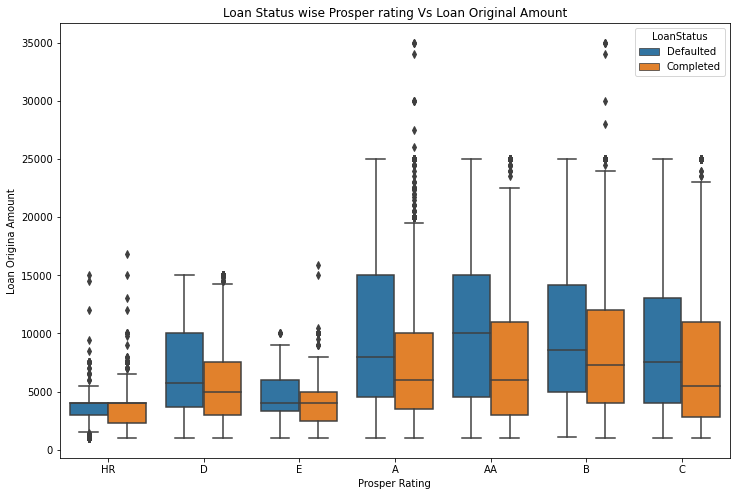

In [35]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',);
plt.title('Loan Status wise Prosper rating Vs Loan Original Amount')
plt.xlabel('Prosper Rating')
plt.ylabel('Loan Origina Amount')

###### Observation 1
* Low ratings are awarded to higher credit Defaulters
* All Orange boxes shows lesses area with one exception i.e. HR, so rating HR shows more Competed borowwers vs Defaulters

###### Multivariate - LoanOriginalAmount, ProsperRating and LoanStatus

Text(0, 0.5, 'Loan Origina Amount')

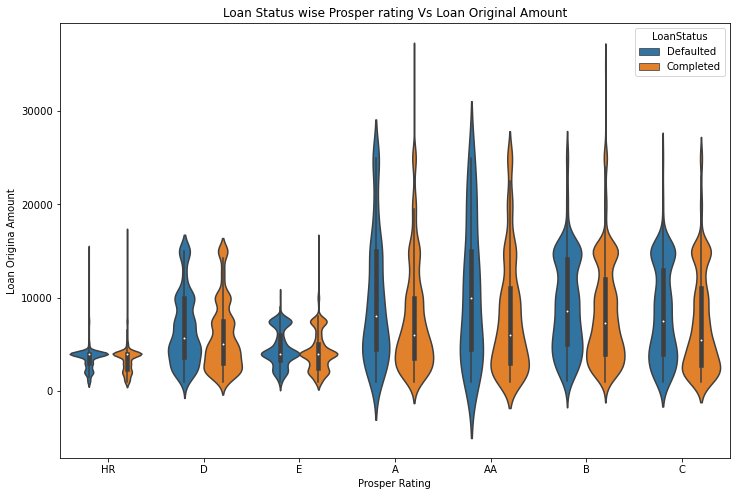

In [36]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');
plt.title('Loan Status wise Prosper rating Vs Loan Original Amount')
plt.xlabel('Prosper Rating')
plt.ylabel('Loan Origina Amount')

###### Observation 2
* Here I found the ProsperRating is not afftected much by the LoanOriginalAmount , for both LoanStatus outcome Defaulted or Completed

###### Multivariate - PropserRating, ListingCategory and Credit outcome

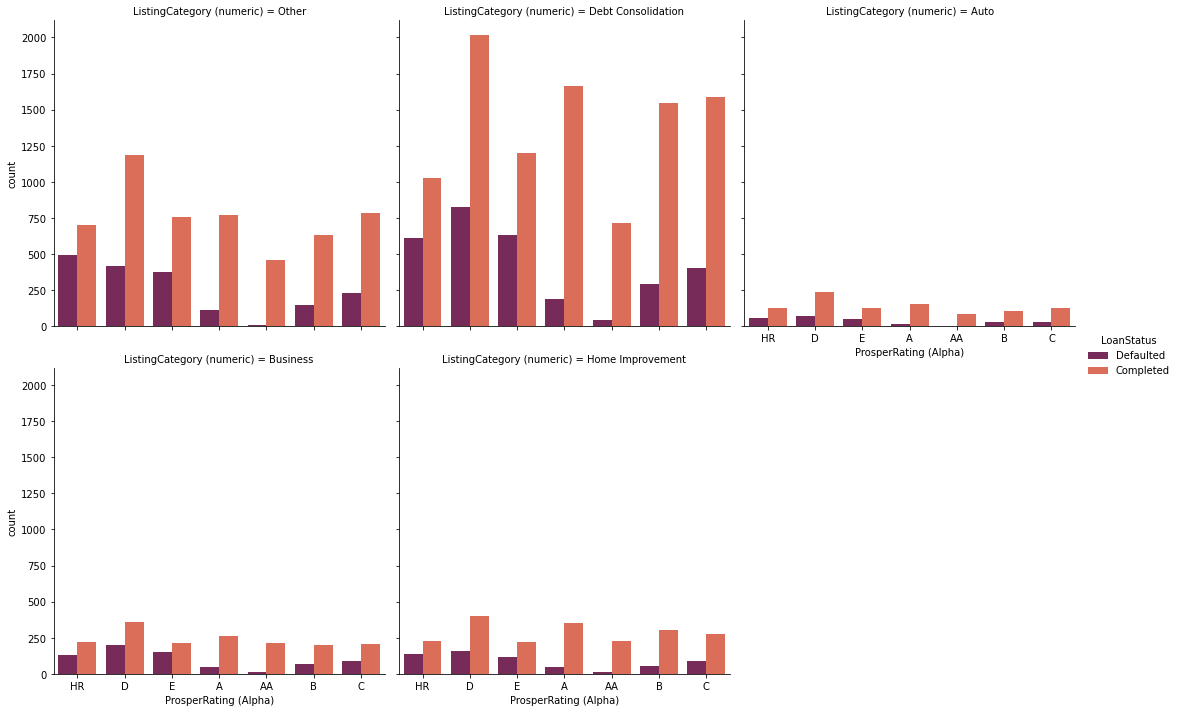

In [37]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = df, kind = 'count', palette = 'rocket', col_wrap = 3);


###### Observation 3
* Other than Deb Consolidation, ListingCategory, there are not much differences to the PropserRating outcome, for Defaulted as well as Completed

#### For multiple features of interest, relationships and the observations
* Most of the Default credits comes from individuals with low Prosper rating and Business category tend to have larger amount.This finding has strengthened the inital assumption.

#### Interesting interactions between features
* It was surprising to note that the Defaults are mor with better PropserRating than the Completed ones

In [3]:
!jupyter nbconvert explorationpart2.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook explorationpart2.ipynb to slides
[NbConvertApp] Writing 597470 bytes to explorationpart2.slides.html
